# 1. Import Library

In [1]:
import numpy as np
import pandas as pd

import os

# 

# 2. Target Variables

In [2]:
os.listdir()

[' 2208541031_Leonardo Edbert Theodora_TUGAS_VI.ipynb',
 ' Pengiriman Data.ipynb',
 '.arduinoIDE',
 '.codeium',
 '.conda',
 '.condarc',
 '.continuum',
 '.cufflinks',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.vscode',
 '2208541031_Leonardo Edbert Theodora_TUGAS_II.ipynb',
 '2208541031_Leonardo Edbert Theodora_TUGAS_III.ipynb',
 '2208541031_Leonardo Edbert Theodora_TUGAS_IV.ipynb',
 '2208541031_Leonardo Edbert Theodora_TUGAS_V.ipynb',
 '2208541031_Leonardo Edbert Theodora_TUGAS_VI - Jupyter Notebook.html',
 '2208541031_Leonardo Edbert Theodora_TUGAS_VI - Jupyter Notebook_files',
 '3D Objects',
 'Airbnb - Fix.ipynb',
 'Airbnb - Leo.ipynb',
 'Airbnb Data Analysis.ipynb',
 'airbnb.csv',
 'Algo IX.ipynb',
 'Algo VII.ipynb',
 'anaconda3',
 'AppData',
 'Application Data',
 'asuransi_mobil.csv',
 'Breadboard1.fzz',
 'bunga_iris.csv',
 'bunga_iris_target.csv',
 'C++',
 'Contacts',
 'Cookies',
 'Credit Risk Model-Project.ipynb',
 'Dataset Pakan.csv',
 'data_bunga_iri.csv

In [3]:
loan_data = pd.read_csv('lc_2016_2017.csv')

C:\Users\santi\AppData\Local\Temp\ipykernel_2908\4234444771.py:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('lc_2016_2017.csv')


In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [5]:
loan_data.shape

(759338, 72)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [7]:
# Fungsi 'unique()' pada suatu series dalam library pandas 
# digunakan untuk mengidentifikasi nilai-nilai unik yang terdapat dalam series tersebut.
# Dalam kasus ini dapat digunakan untuk memeriksa DataFrame yang berisi data string.

loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [8]:
# Syntax tersebut digunakan untuk membuat kolom baru bernama 'good_bad' dalam DataFrame loan_data. 
# Kolom ini bertujuan untuk melihat kolom 'good_bad' yang berisikan data numerik '0' = pembayaran tepat waktu
# dan '1' = pembayaran tidak tepat waktu.

loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                 , 1, 0)

In [9]:
# Berikut adalah banyaknya nilai data yang 'pembayaran tepat waktu' dan 'pembayaran tidak tepat waktu'

loan_data.good_bad.value_counts()

0    702875
1     56463
Name: good_bad, dtype: int64

# 

# 3. Missing Value

In [10]:
# Berikut adalah perbandingan kolom 'loan_status' dan 'good_bad'

loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


In [11]:
# - loan_data.isnull().sum(): Menghitung jumlah nilai-nilai yang hilang (NaN) dalam setiap kolom DataFrame loan_data.
# - / loan_data.shape[0]: Membagi setiap jumlah nilai-nilai yang hilang dengan jumlah baris total dalam DataFrame 
# (loan_data.shape[0]) untuk mendapatkan proporsi nilai-nilai yang hilang relatif terhadap jumlah baris.
# - pd.DataFrame(...): Membuat DataFrame baru dari hasil perhitungan di atas.

missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])


# - missing_values.iloc[:, 0]: Memilih nilai-nilai dalam kolom pertama dari DataFrame 
# missing_values (yaitu, kolom yang berisi proporsi nilai-nilai yang hilang). 
# - [...] > 0.50: Membuat kondisi yang memilih hanya baris-baris di mana proporsi nilai-nilai yang hilang lebih dari 50%.
# - missing_values[...]: Memilih hanya baris-baris yang memenuhi kondisi tersebut, sehingga menghasilkan DataFrame baru yang 
# hanya berisi kolom-kolom yang memiliki lebih dari 50% nilai-nilai yang hilang.

missing_values = missing_values[missing_values.iloc[:,0] > 0.50]


# - missing_values.sort_values([0], ascending=False): Mengurutkan DataFrame missing_values berdasarkan nilai
# kolom pertama (0), yang merupakan proporsi nilai-nilai yang hilang.
# - ascending=False: Mengurutkan secara menurun, sehingga kolom dengan proporsi nilai-nilai 
# yang hilang terbesar akan berada di bagian atas DataFrame.

missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [12]:
# - loan_data.shape[0]: Mengambil jumlah baris dalam DataFrame loan_data.
# - how='all': Ini berarti kolom akan dihapus hanya jika seluruh baris dalam kolom tersebut memiliki nilai yang hilang.
# - axis=1: Menunjukkan bahwa kita ingin melakukan operasi pada kolom (bukan baris).
# - inplace=True: Menunjukkan bahwa perubahan akan dilakukan langsung pada DataFrame 
# loan_data tanpa perlu menyimpan hasilnya ke variabel baru.

loan_data.dropna(thresh = loan_data.shape[0]*0.5, how='all' , axis=1 , inplace=True)

In [13]:
# Berikut adalah hasil dari pembersihan data yang memiliki lebih dari 50% nilai-nilai yang hilang

missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


# 

# 4. Data Splitting 

In [14]:
# Dapat dilihat bahwa terdapat 750k++ baris data dan 66 kolom

loan_data.shape

(759338, 66)

In [15]:
# Akan diimport train_test_spli dari library sklearn.model_selection untuk membentuk model machine learning

from sklearn.model_selection import train_test_split

In [16]:
# Data akan dibagi menjadi 80% train set dan 20% test set
# X adalah seluruh kolom dari DataFrame kecuali kolom 'good_bad'
# y adalah kolom 'good_bad'
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

# - 'test_size=0.2', Parameter ini menentukan proporsi data yang akan dialokasikan sebagai test set
# - 'stratify=y', Parameter ini digunakan untuk memastikan bahwa distribusi kelas pada train set
# dan test set tetap sama seperti distribusi kelas pada dataset asli
# - 'random_state=42', Parameter ini memberikan nilai seed untuk generator angka acak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# Berikut adalah perbandingan nilai 'good' (0) dan 'bad' (1) yang sudah displitting pada train set
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [18]:
# Berikut adalah perbandingan nilai 'good' (0) dan 'bad' (1) yang sudah displitting pada test set
y_test.value_counts(normalize=True)

0    0.925639
1    0.074361
Name: good_bad, dtype: float64

# 

# 5. Data Cleaning

In [19]:
# Berikut adalah data X_train

X_train.shape

(607470, 65)

In [20]:
# Pada fungsi perulangan 'for' berikut, akan dimunculkan kolom-kolom yang bertipe 'object' dan 'bool'

for col in X_train.select_dtypes(include = ['object','bool']).columns :
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

['Aug-1994' 'Sep-2001' 'May-1999' 'Jun-2005' 'Jan-2012' 'Jan-2001'
 'Aug-1991' 'Feb-2006' 'Oct-1989' 'Oct-2000' 'Jun-2001' 'Dec-1993'
 'May-1989' 'Sep-2006' 'Sep-1997' 'Sep-2003' 'May-1982' 'Dec-1996'
 'Jun-1999' 'Oct-2003' 'Sep-2008' 'May-1994' 'Sep-2004' 'Jul-2007'
 'Feb-2008' 'Aug-1985' 'Aug-2002' 'Nov-1998' 'Mar-2012' 'Feb-1993'
 'Aug-2001' 'May-1987' 'Mar-2004' 'Mar-1978' 'Apr-1996' 'Oct-1995'
 'May-2006' 'Oct-2012' 'Dec-2001' 'Jul-2001' 'May-2004' 'Feb-2005'
 'Jul-1995' 'May-2007' 'Feb-2004' 'Feb-2001' 'Jul-2004' 'Sep-1998'
 'Jul-2006' 'Sep-1993' 'Jun-2012' 'Jul-2005' 'Jun-2011' 'Nov-2006'
 'Nov-2002' 'Jan-1996' 'Jul-2003' 'Sep-2007' 'Aug-1999' 'Feb-1994'
 'Apr-2003' 'Aug-2004' 'Oct-2013' 'Dec-2002' 'May-2012' 'Aug-1998'
 'Aug-1997' 'Feb-1981' 'Oct-2004' 'Apr-2007' 'Mar-1993' 'Dec-1989'
 'Apr-2006' 'Apr-2005' 'Nov-2011' 'Aug-2008' 'Aug-2003' 'May-1997'
 'Apr-1997' 'Dec-2005' 'Oct-1990' 'Sep-1995' 'Dec-2004' 'Nov-1992'
 'Sep-2002' 'Aug-2009' 'Oct-1994' 'Aug-2007' 'Jun-1997' 'Jun-2

In [21]:
# Dibentuk variabel 'col_need_to_clean' untuk membentuk 
# data-data yang dapat diukur dengan mengubahnya menjadi data numerik

col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d'
                    , 'last_credit_pull_d']

In [22]:
# Pembersihan pertama, dimulai dengan kolom 'term'

X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [23]:
# Kolom 'term' akan dirubah kedalam bentuk numerik dan akan dihilangkan stringnya

X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [24]:
# Dapat dilihat bahwa kolom 'term' sudah dalam bentuk numerik
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [25]:
# Pembersihan kedua, dilanjutkan dengan kolom 'emp_length'

X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [26]:
# Kolom 'emp_length' akan dirubah kedalam bentuk numerik dan akan dihilangkan stringnya

X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'].fillna(value = 0, inplace=True)

C:\Users\santi\AppData\Local\Temp\ipykernel_2908\4122692218.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')


In [27]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [28]:
# # Dapat dilihat bahwa kolom 'emp_length' sudah dalam bentuk numerik

X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [29]:
# Berikutnya, akan dibentuk variabel dengan time data timedate

col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
            'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [30]:
X_train['issue_d'].unique()

array(['Feb-2017', 'Apr-2016', 'Jul-2017', 'Oct-2016', 'Mar-2017',
       'May-2016', 'Mar-2016', 'Aug-2017', 'Jul-2016', 'Jan-2017',
       'Sep-2016', 'Aug-2016', 'Nov-2016', 'Dec-2016', 'Jun-2016',
       'Sep-2017', 'Feb-2016', 'May-2017', 'Jun-2017', 'Apr-2017',
       'Jan-2016'], dtype=object)

In [31]:
for col in col_date :
    X_train[col] = pd.to_datetime(X_train[col])

In [32]:
# Dapat dilihat bahwa kolom 'issue_d', 'last_pymnt_d', 'next_pymnt_d', dan 'last_credit_pull_d' sudah bertipe data datetime

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [33]:
# Selanjutnya, akan dilakukan pembersihan untuk data X_test

X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

# fillna digunakan untuk mengisi nilai null atau nilai yang kosong pada 'emp_length'

X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date :
    X_test[col] = pd.to_datetime(X_test[col])

C:\Users\santi\AppData\Local\Temp\ipykernel_2908\2796296270.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')


In [34]:
# Berdasarkan pembersihan sebelumnya, dapat dilihat bahwa data 7 kolom diatas sudah bersih dan berbentuk numerik

X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


# 

# 6. Feature Enginnering

In [35]:
# Model awal X_train, X_test, y_train, dan y_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [36]:
# Berikut adalah data prediktor yang akan dipakai untuk memprediksi variable dependent

col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [37]:
X_train[col_need_to_clean]

# Berdasarkan data ini, kolom 'next_pymnt_d' akan tidak terlalu berpengaruh untuk memprediksi 
# karena pembayaran berikut nya akan berubah-ubah dan tergantung dari peminjam

# Sehingga, kolom 'next_pymnt_d' akan dihapus

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,36,4,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,36,10,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,36,0,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,36,5,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,36,6,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...,...,...
150426,36,8,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,36,0,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,36,10,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,36,3,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [38]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [39]:
# Dapat dilihat bahwa kolom 'next_pymnt_d' sudah dihapus

X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [40]:
# Lalu, diperlukan import tanggal dari library 'datetime'

from datetime import date

# Berikut adalah tanggal terkini dan susunannya berdasarkan Tahun, Bulan, dan Hari

date.today().strftime('%Y-%m-%d')

'2024-02-04'

In [41]:
# Berikut adalah banyaknya hari yang ditunjukkan jika pinjaman diambil dari 01 Februari 2017 dan berjalan sampai hari ini

pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-02-01')

Timedelta('2559 days 00:00:00')

In [42]:
X_train

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
147577,36,4,2017-02-01,1994-08-01,2017-12-01,2017-12-01
505776,36,10,2016-04-01,2001-09-01,2017-07-01,2017-11-01
412425,36,0,2017-07-01,1999-05-01,2017-12-01,2017-12-01
618730,36,5,2016-10-01,2005-06-01,2017-12-01,2017-12-01
111143,36,6,2017-03-01,2012-01-01,2017-12-01,2017-12-01
...,...,...,...,...,...,...
150426,36,8,2017-02-01,1998-11-01,2017-11-01,2017-12-01
195135,36,0,2017-01-01,1993-09-01,2017-12-01,2017-12-01
182511,36,10,2017-01-01,1988-03-01,2017-12-01,2017-12-01
82596,36,3,2017-04-01,2003-01-01,2017-12-01,2017-12-01


In [43]:
# Dibentuk function untuk mengukur banyak bulan setelah peminjam meminjam uang
# Catatan : mengapa jumlah bulannya terlampau banyak dari kolom 'term', itu dikarenakan memakai acuan tanggal hari ini. 
# Sehingga, data nya menjadi bias. Seharusnya, menggunakan acuan tanggal saat dimana pinjaman dibuat
# Namun, sebagai contoh tidak apa-apa

def date_columns(df, column) :
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)

# Aplikasikan pada X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

# Aplikasikan pada X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [44]:
# Dapat dilihat bahwa data X_train sudah berbentuk numerik

X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,354.0,84.0,74.0,74.0
505776,36,10,269.0,94.0,79.0,75.0
412425,36,0,297.0,79.0,74.0,74.0
618730,36,5,224.0,88.0,74.0,74.0
111143,36,6,145.0,83.0,74.0,74.0
...,...,...,...,...,...,...
150426,36,8,303.0,84.0,75.0,74.0
195135,36,0,365.0,85.0,74.0,74.0
182511,36,10,431.0,85.0,74.0,74.0
82596,36,3,253.0,82.0,74.0,74.0


In [45]:
# Dapat dilihat bahwa data X_test sudah berbentuk numerik

X_test

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
280647,60,10,291.0,91.0,81.0,74.0
419992,36,7,217.0,79.0,74.0,74.0
44633,36,0,566.0,81.0,75.0,81.0
245940,36,2,218.0,90.0,75.0,74.0
565744,36,0,640.0,87.0,74.0,74.0
...,...,...,...,...,...,...
70748,36,4,143.0,81.0,74.0,74.0
43047,60,4,259.0,81.0,74.0,74.0
99030,36,0,246.0,82.0,74.0,83.0
625689,36,1,138.0,95.0,74.0,74.0


In [46]:
# Dapat dilihat bahwa masih terdapat 735 data kosong pada kolom 'last_pymnt_d' dan 1 data kosong'last_credit_pull_d'

X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [47]:
# Dapat dilihat bahwa masih terdapat 213 data kosong pada kolom 'last_pymnt_d' dan 1 data kosong'last_credit_pull_d'

X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [48]:
# Lalu, X_train dan X_test akan diisi dengan data mean dari masing-masing kolom

X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [49]:
# Dapat dilihat bahwa sudah tidak ada data yang kosong pada X_train

X_train.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

In [50]:
# Dapat dilihat bahwa sudah tidak ada data yang kosong pada X_test

X_test.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

# 

# 7. Modelling

In [51]:
# Diimport model Logistic Regresi untuk melakukan proses machine learning data

from sklearn.linear_model import LogisticRegression

In [52]:
# Dibentuk variabel untuk model Logistic Regresi, yaitu 'model'

model = LogisticRegression()

In [53]:
# Dibentuk fitting data dari data train 'X_train' dan 'y_train'
# Dibentuk variabel prediksi yang mempengaruhi berdasarkan variabel independent 'X_test'

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
# Dibentuk variabel 'result' yang berisikan hasil dari machine learning dengan menggunakan model 'LogisticRegression'
# Berdasarkan 5 data pertama, dapat dilihat bahwa 4 dari 5 data tersebut benar diprediksi
# *catatan : 'y_pred' adalah variabel yang dilakukan uji coba dan 'y_test' adalah variabel kunci atau hasil sebenarnya

result = pd.DataFrame(list(zip(y_pred, y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [55]:
# Lalu, akan dicari skor akurasi prediksi dengan variabel-variabel prediksi yang digabung menjadi 'y_pred'
# Diimport 'accuracy_score' dari sklearn.metrics
# Dapat dilihat bahwa skor akurasinya sekitar 90% atau 0,9...

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9172109990254694

In [56]:
# Karena hasil akurasi ini masih terlalu general, maka akan digunakan property penguji akurasi yang lainnya
# Diimport 'confusion_matrix' dari sklearn.metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

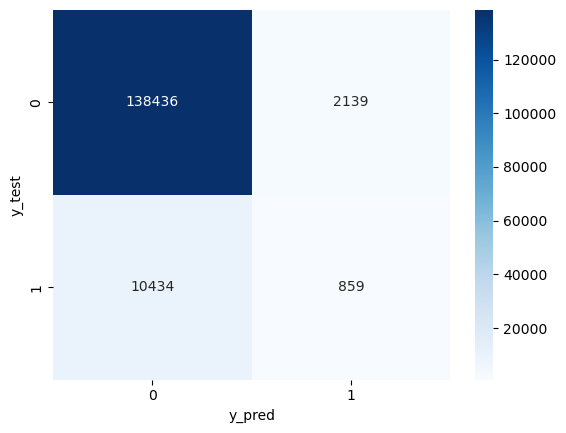

In [57]:
# Matriks kebingungan digunakan untuk mengevaluasi kinerja model 
# klasifikasi dengan membandingkan nilai sebenarnya (y_test) dan nilai prediksi (y_pred).
cm = confusion_matrix(y_test, y_pred)

# fungsi 'heatmap' dari modul seaborn untuk membuat peta panas dari confusion matrix (cm).
# 'annot=True' digunakan untuk menampilkan nilai di dalam sel, 
# 'fmt='.0f'' digunakan untuk mengatur format nilai di dalam sel (dalam hal ini, bilangan bulat tanpa desimal), 
# 'cmap=plt.cm.Blues' digunakan untuk mengatur skema warna peta panas

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [58]:
y_train.value_counts(normalize=True)

# Dapat dilihat bahwa kecenderungan untuk machine learning memiliki '0' atau berhasil bayar sangatlah tinggi, yaitu 90%
# Hal ini dapat berarti ketidakseimbangan, oleh karenanya perlu dilakukan pengujian akurasi kembali

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

# 

# 8. Modelling 2

In [59]:
# Berikut adalah model prediksi dari variabel independent
# '0' disini mengartikan berhasil bayar
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
# Berikut adalah probabilitas dari machine learningnya
# Kolom pertama adalah kolom probabilitas yang berhasil bayar
# Kolom kedua adalah kolom probabilitas yang gagal bayar
model.predict_proba(X_test)

# Karena project berikut lebih condong untuk mencari presentasi kegagalan bayar, maka akan digunakan kolom kedua saja

array([[0.77335211, 0.22664789],
       [0.97521061, 0.02478939],
       [0.98971371, 0.01028629],
       ...,
       [0.99130955, 0.00869045],
       [0.93561291, 0.06438709],
       [0.96325881, 0.03674119]])

In [72]:
y_pred = model.predict_proba(X_test)[:, 1]

In [71]:
# '0' mengartikan bahwa 'False' atau banyak yang gagal bayar
# Dengan demikian, kita perlu mencari thresholds yang mungkin lebih kecil dari 0.5
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

(array([131217.,   9156.,   4312.,   2419.,   1537.,   1027.,    861.,
           682.,    458.,    199.]),
 array([0.00133184, 0.0969471 , 0.19256237, 0.28817763, 0.3837929 ,
        0.47940816, 0.57502343, 0.67063869, 0.76625396, 0.86186922,
        0.95748449]),
 <BarContainer object of 10 artists>)

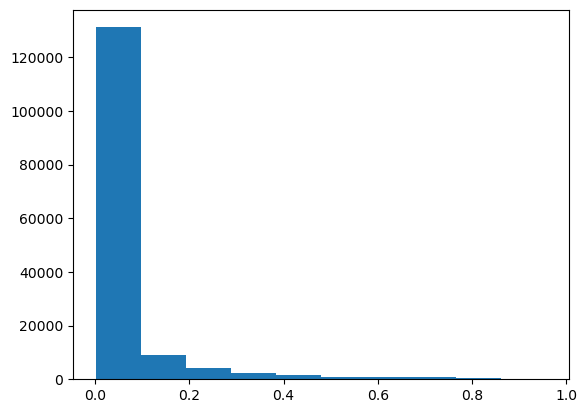

In [64]:
plt.hist(y_pred)

# Dapat dilihat bahwa model prediksi dari variabel dependent atau y_pred memiliki kecenderungan berada disekitar 0 sampai 0.1
# Inilah kasus 'imbalance'
# Sehingga, perlu dicari best threshold dari truepositive rate

In [65]:
# Diimport 'roc_curve' untuk mencari false positive rate (fpr), true positive rate (tpr), dan thresholds dari data imbalance
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [66]:
# rumus fpr ada di google
fpr

array([0.00000000e+00, 7.11364041e-06, 4.97954828e-05, ...,
       9.99879068e-01, 9.99879068e-01, 1.00000000e+00])

In [67]:
# rumus tpr ada di google
tpr

array([0.        , 0.        , 0.        , ..., 0.99991145, 1.        ,
       1.        ])

In [68]:
# rumus thresholds ada di google
thresholds

array([1.95748449e+00, 9.57484490e-01, 9.39890243e-01, ...,
       2.54109396e-03, 2.40341313e-03, 1.33183596e-03])

In [70]:
# Untuk mencari best thresholds, akan digunakan metode youden j-statistics
# Hal ini dimaksudkan untuk mendapatkan nilai fpr yang serendah-rendahnya dan tpr yang setinggi-tingginya

j = tpr - fpr

# Berikut adalah menjadi indext dari j-statistics
ix = np.argmax(j)

# Berikut adalah penentuan thresholds dari data imbalance tersebut
best_thresh = thresholds[ix]
best_thresh

# Didapatkan nilai pembandingnya adalah 0,06... atau 6%

0.06485077197370939

In [75]:
# Dapat dilihat bahwa tidak semuanya menghasilkan '0' atau 'False', 
# yang berarti, ternyata ada yang memungkinkan untuk berhasil bayar dari data imbalance yang 
# sudah diprediksi dengan accuracy_matrix
y_pred = (y_pred > 0.065).astype(int)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

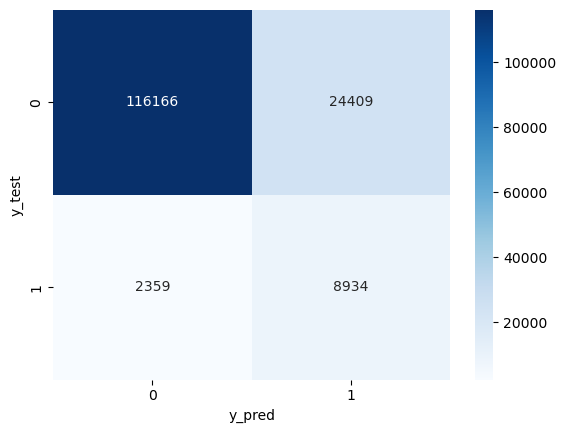

In [77]:
# Berikut adalah hasil confusion_matrix setelah menggunakan thresholds yang sesuai, yaitu 6%

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

# Dapat dilihat peningkatan jumlah yang gagal bayar,
# sehingga hal ini tentu saja prediksi yang lebih baik untuk menghindari kerugian

In [81]:
# Ini adalah koefisien dari model Logistic Regression (Beta 0,...,6)
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

# *catatan = direction yang (-) menandakan perbandingan terbalik antara semakin tingginya nilai dan kemungkinan gagal bayar
# direction yang (+) menandakan perbandingan searah antara semakin tingginya nilai dan kemungkinan gagal bayar
# angka" dari df_coef menunjukkan menunjukkan probabilitas gagal bayar

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.017328,-0.031675,-0.001033,0.045267,0.23676,-0.15468


In [82]:
# Nilai-nilai yang dimaksud pada direction adalah nilai didalam kolom-kolom berikut 
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,354.0,84.0,74.0,74.0
505776,36,10,269.0,94.0,79.0,75.0
412425,36,0,297.0,79.0,74.0,74.0
618730,36,5,224.0,88.0,74.0,74.0
111143,36,6,145.0,83.0,74.0,74.0


In [ ]:
# Demikianlah project Credit Risk Model
# Kesimpulannya berada pada df_coef dan dibandingkan dengan X_train